# Newton's Method for Finding a Zero
Goal: understand the process by which Newton's method can be used to find a zero of a differentiable function.  
  
This method will be usable only for functions for which we can calculate a formula for the derivative and there are some cases where this method will yield some unexpected behaviors, but generally it is quite fast and effective. Further considerations are available at https://en.wikipedia.org/wiki/Newton%27s_method. Some of the examples used here were pulled from the wikipedia.

Let's start by considering a specific example for which we know the answers. Recall that the function $f(x) = x^2 -4$ has zeros at $x = 2$ and $x = -2$. The derivative is given by $f'(x) = 2x$. First we'll plot $f(x)$.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2 - 4

def df_dx(x):
    return 2*x

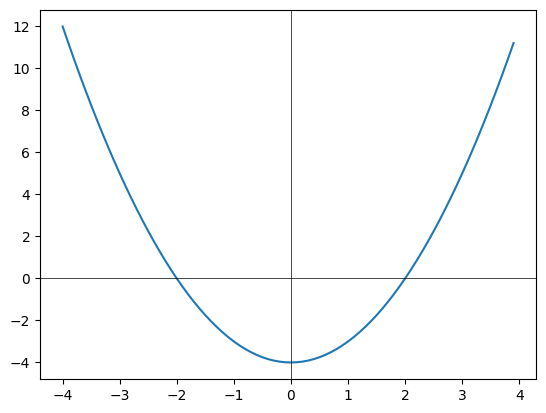

In [11]:
# set a sampling range and rate for x values for the graph of f
graph_f_xs = np.arange(-4,4,0.1)

# plot the graph
plt.plot(graph_f_xs, f(graph_f_xs))

# show x and y axis
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

plt.show()

Now we'll start with an initial guess as to where the zero might be. We'll call this guess $x_0$. For illustration, we'll guess $x_0 = 3.5$. Now we'll draw a tangent line at the point on the graph above our initial guess. Recall the equation for a tangent line to the graph at $(x_0, f(x_0))$ is given by $$T(x) = f'(x_0)(x- x_0) + f(x_0)$$

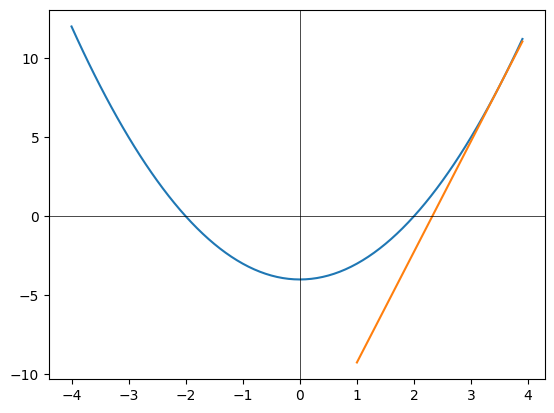

In [12]:
# plot the graph of f(x)
graph_f_xs = np.arange(-4,4,0.1)
plt.plot(graph_f_xs, f(graph_f_xs))

# plot tangent line
tangent_line_xs = np.arange(1,4,0.1)
plt.plot(tangent_line_xs, df_dx(3.5)*(tangent_line_xs - 3.5)+ f(3.5))


# show x and y axis
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

plt.show()

Now, we suppose that the tangent line is more or less the function and follow it to its intersection with the x axis. This amounts to solving for $x$ in the equation $$0 = f'(x_0)(x- x_0) + f(x_0)$$. This gives us our first approximation of a zero, we'll call this $x_1$. $$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$ From our picture, we can see that this is off by a bit, but it's closer. If we employ the same technique, we'll get a new guess $x_2$ that's even closer. The general formula we'll use is $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In [29]:
def next_guess(previous_guess):
    next_guess = previous_guess - f(previous_guess)/df_dx(previous_guess)
    return next_guess

newtons_list = [5]
for i in range(4):
    newtons_list.append(next_guess(newtons_list[-1]))

newtons_list

[5, 57.2, 33.381468531468535, 24.883902871907868, 23.43299256836254]

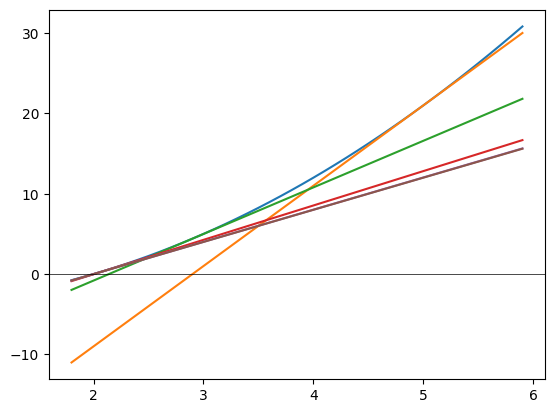

In [27]:
# plot the graph of f(x)
graph_f_xs = np.arange(1.8,6,0.1)
plt.plot(graph_f_xs, f(graph_f_xs))

# plot tangent line
for x_n in newtons_list:
    tangent_line_xs = np.arange(1.8,6,0.1)
    plt.plot(tangent_line_xs, df_dx(x_n)*(tangent_line_xs - x_n)+ f(x_n))


# show x and y axis
plt.axhline(0, color='black', linewidth=.5)
# plt.axvline(0, color='black', linewidth=.5)

plt.show()

Let's try to find the square root of 547. This amounts to finding a zero of $x^2 - 547$, so we set up our function and its derivative. We'll make our initial guess 1.

In [30]:


def f(x):
    return x**2 - 547

def df_dx(x):
    return 2*x

def newtons_method(f, df_dx, initial_guess, number_of_iterations):
    
    def next_guess(previous_guess):
        next_guess = previous_guess - f(previous_guess)/df_dx(previous_guess)
        return next_guess

    newtons_list = [initial_guess]
    for i in range(number_of_iterations):
        newtons_list.append(next_guess(newtons_list[-1]))

    return newtons_list

newtons_method(f, df_dx, 1, 15)

[1,
 274.0,
 137.99817518248176,
 70.98099785663632,
 39.34364284371367,
 26.623389203377094,
 23.584616576825635,
 23.38885042888342,
 23.3880311414029,
 23.388031127053,
 23.388031127052997,
 23.388031127053,
 23.388031127052997,
 23.388031127053,
 23.388031127052997,
 23.388031127053]

Newton's Method isn't without complications, for instance, there can sometimes be an oscillatory trap. This only happens with some functions and some guesses, but it can happen. Try changing the initial guess around a bit. Some suggestions: 1.0, 1.2, 2, 1.23, 1.24, 1.25, 4.

In [54]:
def f(x):
    return x**3 - 2*x + 2

def df_dx(x):
    return 3*x**2 - 2

newtons_method(f, df_dx, 1.0, 20)

[1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0]

A delightful accident is that Newton's Method happens to work in an identical fashion in the complex plane. The following code shows the function from the previous example in the complex plane. The window is from -1 to 1 in both x and y. You can see how complicated the interface is along the real axis. This is basically the reason for the weirdness in our previous example. Behavior that exhibits sensative dependence on initial conditions is challed chaotic. The study of systems like this one are studied in the related fields of Complex Dynamics and Chaos Theory.

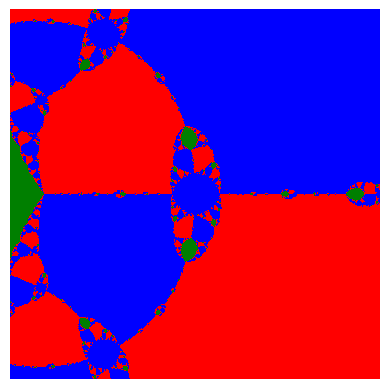

In [59]:
# This code is from https://scipython.com/

from matplotlib.colors import ListedColormap

# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**3 - 2*z + 2
fprime = lambda z: 3*z**2 - 2

plot_newton_fractal(f, fprime, n=500)